<a href="https://colab.research.google.com/github/Arifanalysis/Fabric-class/blob/main/comparison_of_stack_lstm_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sobouhiarif/fabric-classifications
#kaggle datasets download -d sobouhiarif/fabric-defect-test

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/sobouhiarif/fabric-classifications
License(s): unknown
100% 902M/903M [00:49<00:00, 16.8MB/s]
100% 903M/903M [00:49<00:00, 19.1MB/s]


In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/fabric-classifications.zip'

# Specify the directory where you want to extract the contents
extract_path = '/content/Fabric FDD/Fabric_classification'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
from google.colab import files
import shutil
folder_path = "/content/Fabric FDD/Fabric_classification"
zip_file_path = "/content/fabric-classifications.zip"
shutil.make_archive(zip_file_path[:-4], 'zip', folder_path)

'/content/fabric-classifications.zip'

Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 784, 128)            │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 784, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 392, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,925 (851.27 KB)

 Trainable params: 217,797 (850.77 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.2251 - loss: 3.3364 - val_accuracy: 0.2375 - val_loss: 2.4669 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3391 - loss: 2.4241 - val_accuracy: 0.2954 - val_loss: 2.3382 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4067 - loss: 2.1154 - val_accuracy: 0.2834 - val_loss: 2.1992 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4873 - loss: 1.8747 - val_accuracy: 0.2635 - val_loss: 2.0959 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5542 - loss: 1.6758 - val_accuracy: 0.4431 - val_loss: 1.9323 - learning_rate: 0.0010
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5866 - loss: 1.5354 - val_accuracy: 0.4251 - val_loss: 1.8093 - learning_rate: 0.0010
Epoch 7/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6350 - loss: 1.3581 - va

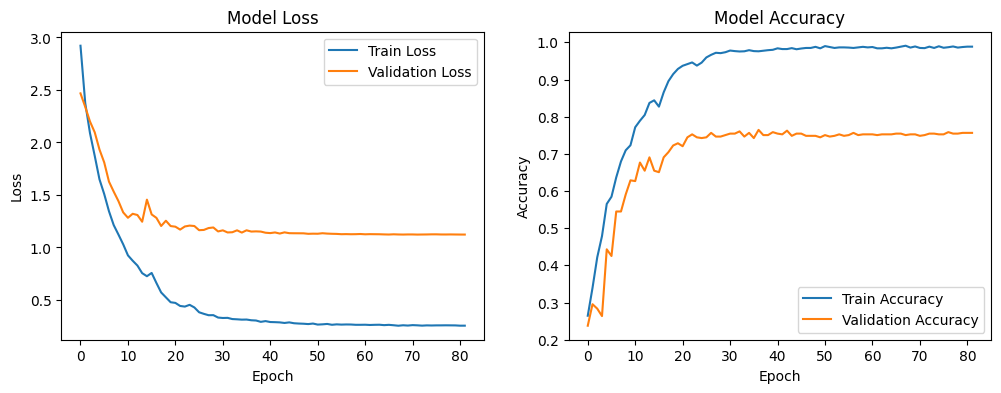

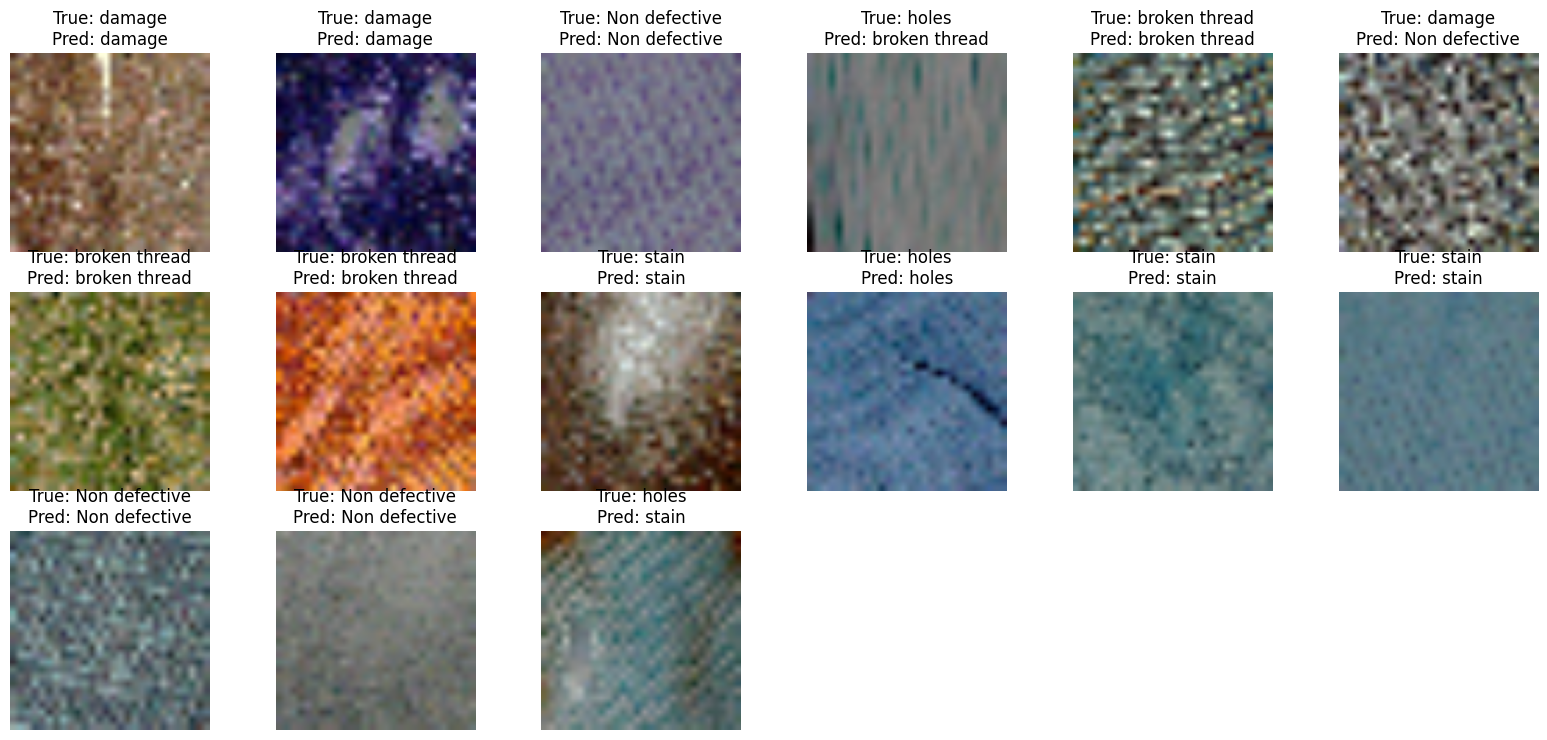

In [ ]:
#LSTM-CNN model
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}
    # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the single LSTM-CNN model
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))


# Ensure the input dimension is compatible with Conv1D
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Flatten and add the output layer
model.add(Flatten())
model.add(Dense(len(categories), activation='softmax', kernel_regularizer='l2'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

# Calculate and display accuracy for each category
category_accuracies = {}
for i, category in enumerate(categories):
    category_mask = (trueY_classes == i)
    category_correct = (predY_classes[category_mask] == i).sum()
    category_total = category_mask.sum()
    category_accuracies[category] = category_correct / category_total
    print(f"Accuracy for {category}: {category_accuracies[category]:.2f}")

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize test images with improved pixel quality and ensure class representation
plt.figure(figsize=(20, 15))

# Dictionary to track how many images have been displayed per class
displayed_count = {category: 0 for category in categories}

# Maximum number of images to display per class
max_images_per_class = 3

displayed_images = 0
for i in range(len(testX)):
    true_label = categories[trueY_classes[i]]
    if displayed_count[true_label] < max_images_per_class:
        plt.subplot(5, 6, displayed_images + 1)  # Adjusting the grid for 18 images
        resized_image = cv2.resize(testX[i].reshape(28, 28, 3), (128, 128))  # Rescale for better quality
        plt.imshow(resized_image)
        plt.title(f"True: {true_label}\nPred: {categories[predY_classes[i]]}")
        plt.axis('off')

        displayed_count[true_label] += 1
        displayed_images += 1

    # Break the loop after displaying 18 images (3 images per class, 6 classes)
    if displayed_images >= max_images_per_class * len(categories):
        break

plt.show()


Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 784, 128)            │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 784, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 784, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 784, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 784, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 784, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 392, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 255,045 (996.27 KB)

 Trainable params: 254,917 (995.77 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.2303 - loss: 2.8169 - val_accuracy: 0.1876 - val_loss: 2.2799 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3141 - loss: 2.1421 - val_accuracy: 0.2315 - val_loss: 2.1571 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.3380 - loss: 1.9839 - val_accuracy: 0.2894 - val_loss: 2.0255 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.4010 - loss: 1.8298 - val_accuracy: 0.3114 - val_loss: 1.9159 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4031 - loss: 1.7696 - val_accuracy: 0.4112 - val_loss: 1.8252 - learning_rate: 0.0010
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.4818 - loss: 1.5535 - val_accuracy: 0.4072 - val_loss: 1.7018 - learning_rate: 0.0010
Epoch 7/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.5079 - loss: 1.4476 - va

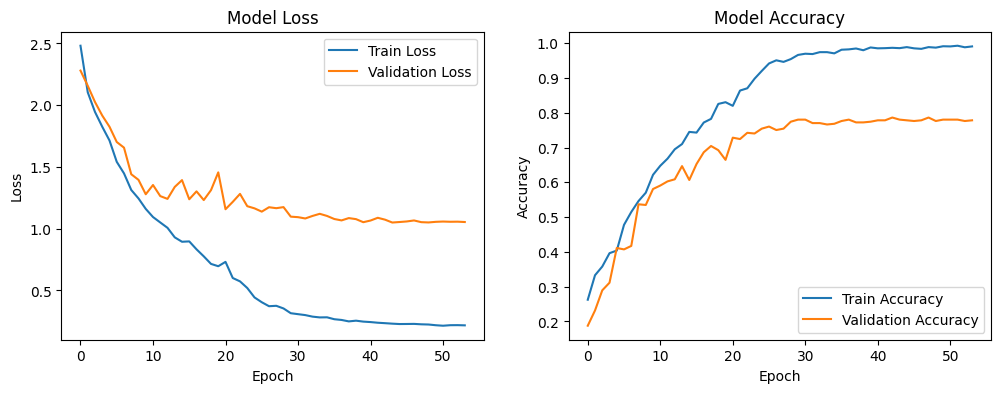

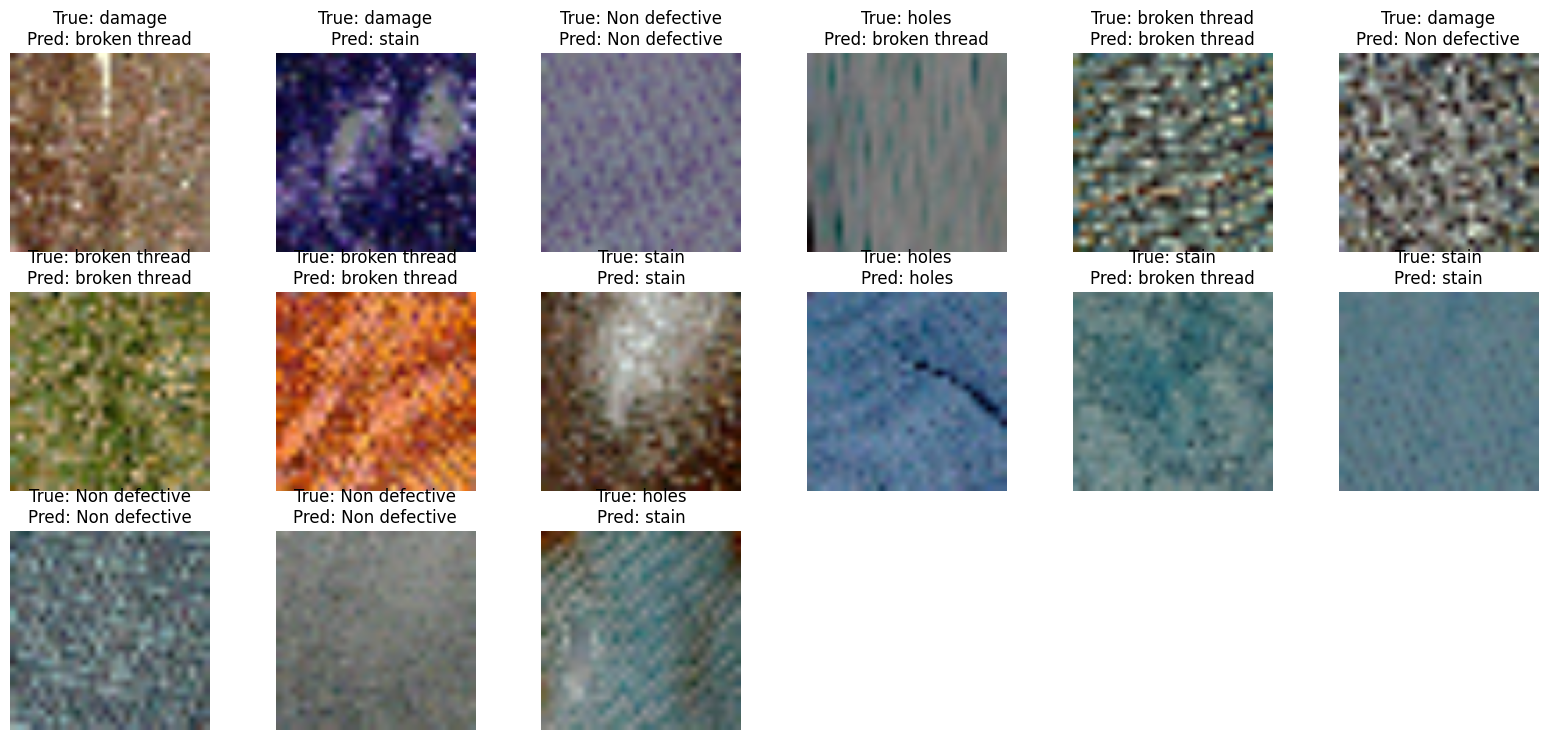

In [ ]:
#LSTM-CNN model
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}
    # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the LSTM-CNN model with an additional LSTM layer
model = Sequential()

# First LSTM layer
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))

# Second LSTM layer
model.add(LSTM(64, return_sequences=True))  # Added second LSTM layer
model.add(Dropout(0.3))  # Optional: Add dropout after the second LSTM

# Conv1D layer
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Flatten and output layer
model.add(Flatten())
model.add(Dense(len(categories), activation='softmax', kernel_regularizer='l2'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

# Calculate and display accuracy for each category
category_accuracies = {}
for i, category in enumerate(categories):
    category_mask = (trueY_classes == i)
    category_correct = (predY_classes[category_mask] == i).sum()
    category_total = category_mask.sum()
    category_accuracies[category] = category_correct / category_total
    print(f"Accuracy for {category}: {category_accuracies[category]:.2f}")

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize test images with improved pixel quality and ensure class representation
plt.figure(figsize=(20, 15))

# Dictionary to track how many images have been displayed per class
displayed_count = {category: 0 for category in categories}

# Maximum number of images to display per class
max_images_per_class = 3

displayed_images = 0
for i in range(len(testX)):
    true_label = categories[trueY_classes[i]]
    if displayed_count[true_label] < max_images_per_class:
        plt.subplot(5, 6, displayed_images + 1)  # Adjusting the grid for 18 images
        resized_image = cv2.resize(testX[i].reshape(28, 28, 3), (128, 128))  # Rescale for better quality
        plt.imshow(resized_image)
        plt.title(f"True: {true_label}\nPred: {categories[predY_classes[i]]}")
        plt.axis('off')

        displayed_count[true_label] += 1
        displayed_images += 1

    # Break the loop after displaying 18 images (3 images per class, 6 classes)
    if displayed_images >= max_images_per_class * len(categories):
        break

plt.show()


Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 784, 128)            │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 784, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 784, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 784, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 784, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 784, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 784, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 784, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 392, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261,317 (1020.77 KB)

 Trainable params: 261,189 (1020.27 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.2018 - loss: 2.4024 - val_accuracy: 0.2236 - val_loss: 2.0899 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.2813 - loss: 2.0249 - val_accuracy: 0.1876 - val_loss: 2.0221 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.3231 - loss: 1.8985 - val_accuracy: 0.2715 - val_loss: 1.9264 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.3753 - loss: 1.7486 - val_accuracy: 0.2575 - val_loss: 1.8408 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.3909 - loss: 1.6887 - val_accuracy: 0.3473 - val_loss: 1.7664 - learning_rate: 0.0010
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.4105 - loss: 1.5876 - val_accuracy: 0.4032 - val_loss: 1.6776 - learning_rate: 0.0010
Epoch 7/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.4208 - loss: 1.4987 - 

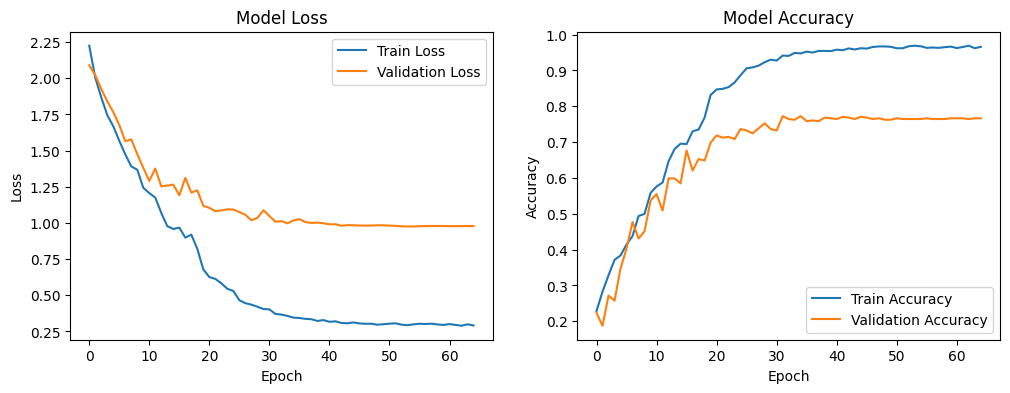

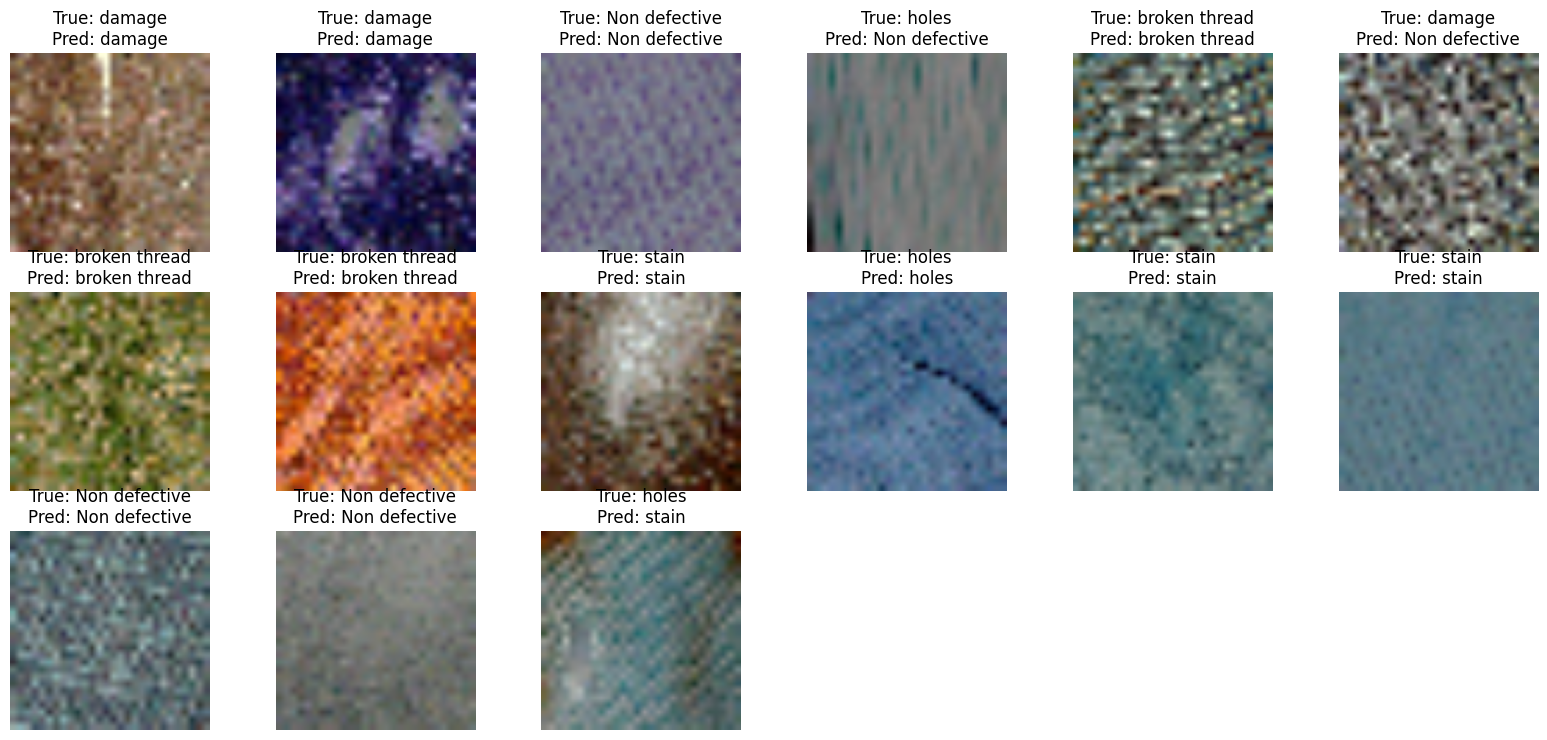

In [ ]:
#LSTM-CNN model
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}
    # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the LSTM-CNN model with an additional LSTM layer
model = Sequential()

# First LSTM layer
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))

# Second LSTM layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer (New Layer)
model.add(LSTM(32, return_sequences=True))  # Added third LSTM layer
model.add(Dropout(0.3))  # Optional: Add dropout after the third LSTM

# Conv1D layer
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Flatten and output layer
model.add(Flatten())
model.add(Dense(len(categories), activation='softmax', kernel_regularizer='l2'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())


# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

# Calculate and display accuracy for each category
category_accuracies = {}
for i, category in enumerate(categories):
    category_mask = (trueY_classes == i)
    category_correct = (predY_classes[category_mask] == i).sum()
    category_total = category_mask.sum()
    category_accuracies[category] = category_correct / category_total
    print(f"Accuracy for {category}: {category_accuracies[category]:.2f}")

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize test images with improved pixel quality and ensure class representation
plt.figure(figsize=(20, 15))

# Dictionary to track how many images have been displayed per class
displayed_count = {category: 0 for category in categories}

# Maximum number of images to display per class
max_images_per_class = 3

displayed_images = 0
for i in range(len(testX)):
    true_label = categories[trueY_classes[i]]
    if displayed_count[true_label] < max_images_per_class:
        plt.subplot(5, 6, displayed_images + 1)  # Adjusting the grid for 18 images
        resized_image = cv2.resize(testX[i].reshape(28, 28, 3), (128, 128))  # Rescale for better quality
        plt.imshow(resized_image)
        plt.title(f"True: {true_label}\nPred: {categories[predY_classes[i]]}")
        plt.axis('off')

        displayed_count[true_label] += 1
        displayed_images += 1

    # Break the loop after displaying 18 images (3 images per class, 6 classes)
    if displayed_images >= max_images_per_class * len(categories):
        break

plt.show()


Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 784, 128)            │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 784, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 784, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 784, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 784, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 784, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 784, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 784, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 392, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 392, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 392, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 196, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 196, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 196, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 98, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 386,117 (1.47 MB)

 Trainable params: 385,221 (1.47 MB)

 Non-trainable params: 896 (3.50 KB)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.2048 - loss: 6.8600 - val_accuracy: 0.1876 - val_loss: 4.9411 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.2070 - loss: 6.4890 - val_accuracy: 0.2116 - val_loss: 5.3015 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.2258 - loss: 6.2333 - val_accuracy: 0.1936 - val_loss: 8.5806 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.2451 - loss: 5.5884
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.2452 - loss: 5.5879 - val_accuracy: 0.2236 - val_loss: 16.1214 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.2489 - loss: 5.1329 - val_accuracy: 0.2236 - val_loss: 16.5662 - learning_rate: 5.0000e-04
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.2722 - loss: 4.

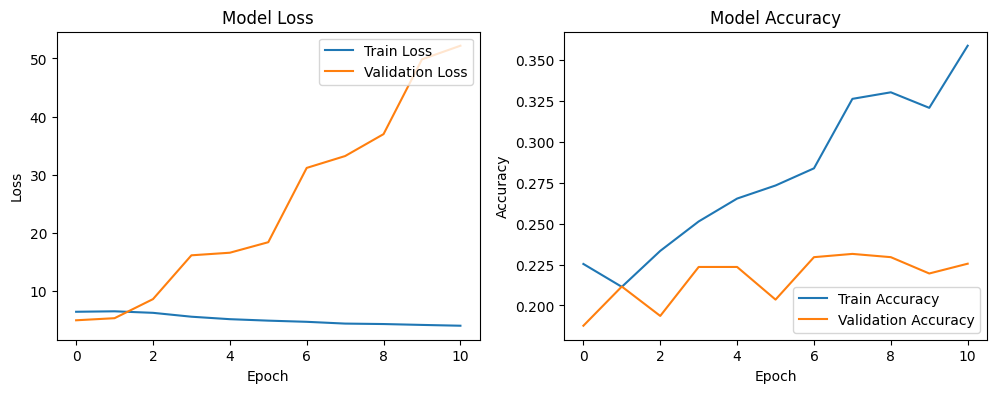

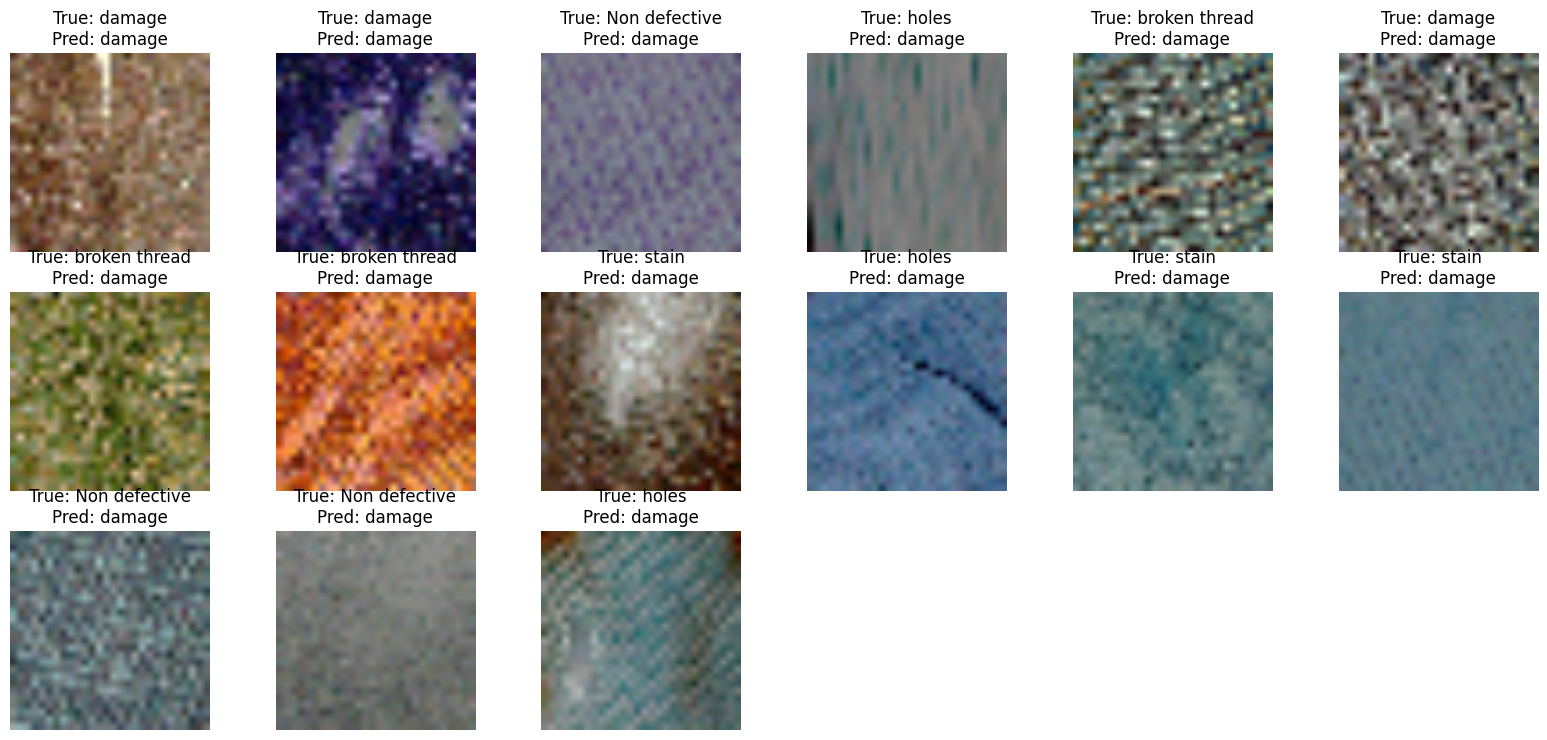

In [ ]:
#LSTM-CNN model
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}
    # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the LSTM-CNN model with an additional LSTM layer and two additional CNN layers
model = Sequential()

# First LSTM layer
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))

# Second LSTM layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer (New Layer)
model.add(LSTM(32, return_sequences=True))  # Added third LSTM layer
model.add(Dropout(0.3))  # Optional: Add dropout after the third LSTM

# First Conv1D layer
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Second Conv1D layer (New Layer)
model.add(Conv1D(128, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Third Conv1D layer (New Layer)
model.add(Conv1D(256, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Flatten and output layer
model.add(Flatten())
model.add(Dense(len(categories), activation='softmax', kernel_regularizer='l2'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())



# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

# Calculate and display accuracy for each category
category_accuracies = {}
for i, category in enumerate(categories):
    category_mask = (trueY_classes == i)
    category_correct = (predY_classes[category_mask] == i).sum()
    category_total = category_mask.sum()
    category_accuracies[category] = category_correct / category_total
    print(f"Accuracy for {category}: {category_accuracies[category]:.2f}")

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize test images with improved pixel quality and ensure class representation
plt.figure(figsize=(20, 15))

# Dictionary to track how many images have been displayed per class
displayed_count = {category: 0 for category in categories}

# Maximum number of images to display per class
max_images_per_class = 3

displayed_images = 0
for i in range(len(testX)):
    true_label = categories[trueY_classes[i]]
    if displayed_count[true_label] < max_images_per_class:
        plt.subplot(5, 6, displayed_images + 1)  # Adjusting the grid for 18 images
        resized_image = cv2.resize(testX[i].reshape(28, 28, 3), (128, 128))  # Rescale for better quality
        plt.imshow(resized_image)
        plt.title(f"True: {true_label}\nPred: {categories[predY_classes[i]]}")
        plt.axis('off')

        displayed_count[true_label] += 1
        displayed_images += 1

    # Break the loop after displaying 18 images (3 images per class, 6 classes)
    if displayed_images >= max_images_per_class * len(categories):
        break

plt.show()
